In [139]:
from optimizers import *
from functions import *
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

## A polynomial

$$
    f(x, y) = \frac{1}{4} x^2 + y^2 + \frac{1}{16} (x - 1)^2 (y - 1)^2
$$
$$
    R(x) = [r_1(x), r_2(x), r_3(x)]
$$
$$
    r_1(x, y) = \frac{1}{2} x, \quad r_2(x, y) = y, \quad r_3(x, y) = \frac{1}{4} (x - 1) (y - 1) 
$$

In [140]:
def f(x):
    return (1/4) * x[0]**2 + x[1]**2 + (1/16) * (x[0] - 1)**2 * (x[1] - 1)**2

def df(x):
    return np.array(
        [
            (1/2) * x[0] + (1/8) * (x[0] - 1) * (x[1] - 1)**2,
            2 * x[1] + (1/8) * (x[0] - 1)**2 * (x[1] - 1)
        ]
    )

def d2f(x):
    return np.array(
        [
            [1/2 + (1/8) * (x[1] - 1)**2, (1/4) * (x[0] - 1) * (x[1] - 1)],
            [(1/4) * (x[0] - 1) * (x[1] - 1), 2 + (1/8) * (x[0] - 1)**2]
        ]
    )

def R(x):
    return np.array([1/2 * x[0], x[1], 1/4 * (x[0] - 1) * (x[1] - 1)])

def dR(x):
    return np.array(
        [
            [1/2, 0],
            [0, 1],
            [1/4 * (x[1] - 1), 1/4 * (x[0] - 1)]
        ]
    )

def d2R(x):
    return np.array(
        [
            [
                [0, 0],
                [0, 0]
            ],
            [
                [0, 0],
                [0, 0]
            ],
            [
                [0, 1/4],
                [1/4, 0]
            ]
        ]
    )

F = Function(R, dR, d2R, M=2, N=3)

p0 = np.array([0, 0])
print(np.linalg.norm(f(p0) - np.linalg.norm(R(p0))**2))
print(np.linalg.norm(df(p0) - 2 * R(p0) @ dR(p0)))
print(np.linalg.norm(d2f(p0) - 2 * (dR(p0).T @ dR(p0) + (d2R(p0).T @ R(p0)).T)))

0.0
0.0
0.0


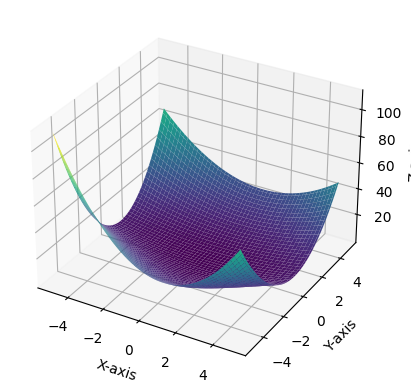

In [141]:
# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Use projection='3d' directly

# Generate data for x, y, and z
Xs = np.linspace(-5, 5, 100)
Ys = np.linspace(-5, 5, 100)

Xs, Ys = np.meshgrid(Xs, Ys)
Zs = np.array([[f(np.array([x, y])) for x, y in zip(xrow, yrow)] for xrow, yrow in zip(Xs, Ys)])

# Plot the surface
ax.plot_surface(Xs, Ys, Zs, cmap='viridis')

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# ax.set_title('3D Plot of a Function')

# Display the plot (optional)
plt.show()

## Performence tests

Running Newton


Newton: 100%|██████████| 10/10 [00:00<00:00, 10003.11it/s]


Running Gauss-Newton


Gauss-Newton: 100%|██████████| 10/10 [00:00<?, ?it/s]


Running Gradient descent


Gradient descent: 100%|██████████| 10/10 [00:00<?, ?it/s]


Running Levenberg-Marquardt (const)


Levenberg-Marquardt: 100%|██████████| 10/10 [00:00<00:00, 5000.96it/s]


Running Levenberg-Marquardt (changing)


Levenberg-Marquardt: 100%|██████████| 10/10 [00:00<00:00, 2500.63it/s]


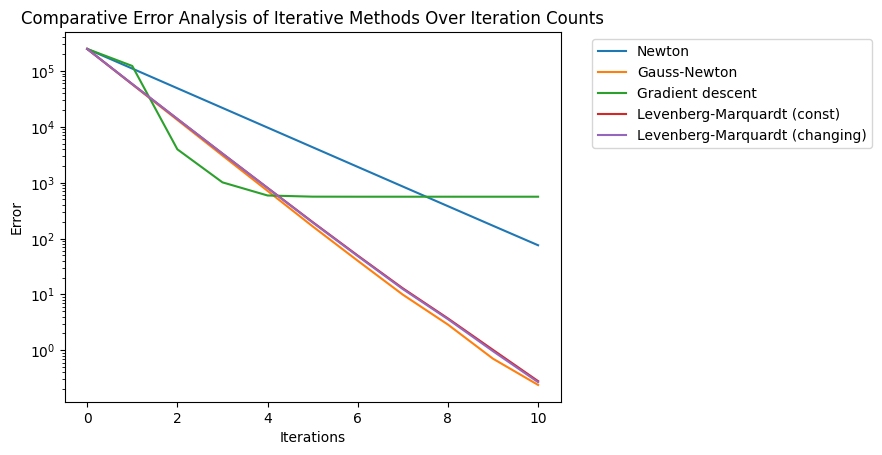

In [142]:
M = 2
max_iter = 10
np.random.seed(1)
p0 = 1000 * np.random.randn(M)
alpha_gd = 1e-5
alpha_gn = 1.0
lambda0 = 1e-2
lambda_change = 1.1
step_max_iter = 10
step_tol = 1e-6

NEWTON = "Newton"
GAUSS_NEWTON = "Gauss-Newton"
GRADIENT_DESCENT = "Gradient descent"
LEVENBERG_MARQUARDT_CONST_PARAM = "Levenberg-Marquardt (const)"
LEVENBERG_MARQUARDT_MODIFYING_PARAM = "Levenberg-Marquardt (changing)"
optimizer_names = [
    NEWTON,
    GAUSS_NEWTON,
    GRADIENT_DESCENT,
    LEVENBERG_MARQUARDT_CONST_PARAM,
    LEVENBERG_MARQUARDT_MODIFYING_PARAM,
]

errors = {name: [] for name in optimizer_names}
points = {name: [] for name in optimizer_names}

optimizer_functions = {
    NEWTON: lambda points, errs: newton(R=F, p0=p0, max_iter=max_iter, alpha=alpha_gn, points=points, errs=errs),
    GAUSS_NEWTON: lambda points, errs: gauss_newton(R=F, p0=p0, alpha=alpha_gn, max_iter=max_iter, points=points, errs=errs),
    GRADIENT_DESCENT: lambda points, errs: gradient_descent(R=F, p0=p0, alpha=alpha_gd, max_iter=max_iter, points=points, errs=errs),
    LEVENBERG_MARQUARDT_CONST_PARAM: lambda points, errs: (
        LevenbergMarquardt(R=F, lambda_param_fun=LevenbergMarquardt.LambdaParamConstant(lambda0=lambda0))
        .optimize(p0, max_iter, step_type="cgnr", step_max_iter=step_max_iter, step_tol=step_tol, points=points, errs=errs)
    ),
    LEVENBERG_MARQUARDT_MODIFYING_PARAM: lambda points, errs: (
        LevenbergMarquardt(R=F, lambda_param_fun=LevenbergMarquardt.LambdaParamDefaultModifier(lambda0=lambda0, lambda_change=lambda_change))
        .optimize(p0, max_iter, step_type="cgnr", step_max_iter=step_max_iter, step_tol=step_tol, points=points, errs=errs)
    ),
}

for name, optimizer in optimizer_functions.items():
    print("Running " + name)
    optimizer(points=points[name], errs=errors[name])

iters = np.arange(0, max_iter + 1)
for label, err in errors.items():
    try:
        plt.plot(iters, err, label=label)
    except:
        print("error in plotting for " + label)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Comparative Error Analysis of Iterative Methods Over Iteration Counts")
plt.show()

## WIP

In [143]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def normF(x: np.ndarray) -> np.float64:
    return np.linalg.norm(F(x))**2

def animate(name, num_iters):
    def update(frame, data, line):
        scatter = ax.scatter(data[frame, 0], data[frame, 1], normF(data[frame]), c='r', marker='o')
        line = ax.plot(data[:frame+1, 0], data[:frame+1, 1], np.array([normF(x) for x in data[:frame+1]]), 'b-')[0]
        return scatter, line

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    Xs = np.linspace(-100, 1250, 1000)
    Ys = np.linspace(-500, 500, 1000)

    Xs, Ys = np.meshgrid(Xs, Ys)
    Zs = np.array([[normF(np.array([x, y])) for x, y in zip(xrow, yrow)] for xrow, yrow in zip(Xs, Ys)])

    ax.plot_surface(Xs, Ys, Zs, cmap='viridis', alpha=0.8)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(name)

    trajectory = np.array(points[name])[:num_iters]

    line = ax.plot([], [], [], 'b')[0]

    ani = FuncAnimation(fig, update, frames=num_iters, fargs=(trajectory, line), blit=True)

    display(HTML(ani.to_jshtml()))


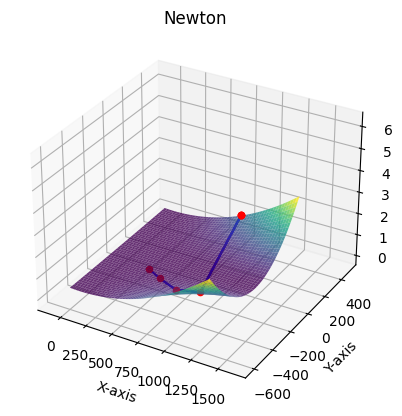

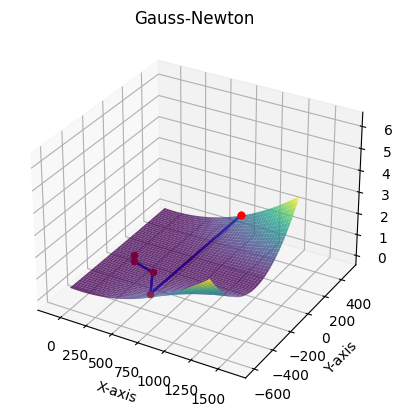

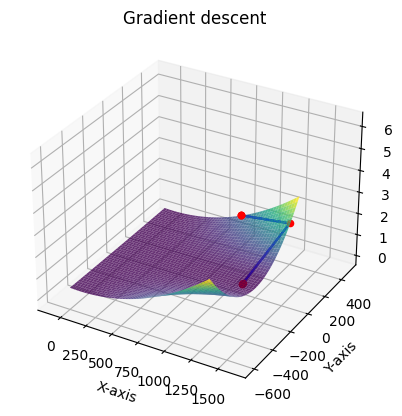

In [144]:
num_iters = 5
animate(NEWTON, num_iters)
animate(GAUSS_NEWTON, num_iters)
animate(GRADIENT_DESCENT, num_iters)